In [1]:
# import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../utils/')
from neuralNet import NeuralNet
from search import gridSearchCV
sns.set_style("darkgrid")

from search import ParamGrid

# Loading data



In [2]:
def vectorized_result(j):

    y = np.zeros((10, 1))
    y[j] = 1.0
    return y



data = pd.read_csv('./../data/part1.csv', header=None)

X = np.array(data.iloc[:, :784])
Y = np.array(data.iloc[:, -1], dtype=np.int32)
n = X.shape[0]
idx = np.arange(0, len(X))
np.random.shuffle(idx)
frac = int(0.8*len(X))
train_x = [np.reshape(x, (-1, 1)) for x in X[idx[:frac]]]
train_y = [vectorized_result(y) for y in Y[idx[:frac]]]
train_data = list(zip(train_x, train_y))
test_x = [np.reshape(x, (-1, 1)) for x in X[idx[frac:]]]
test_y = Y[idx[frac:]]
test_data = list(zip(test_x, test_y))


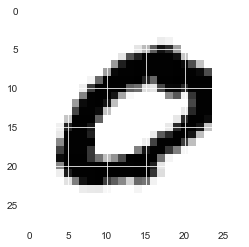

In [3]:
# Visualize data
plt.imshow(X[10].reshape(28,28),cmap=plt.cm.binary)
plt.show()

### relu Function 

In [ ]:
# Working with Sigmoid activation function
model_sigmoid = NeuralNet(size=[784,30,10],cost='cross_entropy_cost',neuron_type='relu')


# Tuning deciding the epoch and bacth size 
# Grid search CV
# params = {
#     'neuron_type': ['sigmoid'],
#     'epoch': [10],
#     'eta': [1e0],
#     'cost': ['cross_entropy_cost'],
#     'sizes': [[784, 30, 10]],
#     'batch_size': [1, 4, 8, 16],
#     'lmbda': [0]

# }

train_accuracy, train_cost, test_accuracy, test_cost= model_sigmoid.fit(
    train_data, epochs=40, eta=1e-2, test_data=test_data, lmda=0, mini_batch_size=4,verbose=True)




Text(0.5, -0.05, 'layers [784,30,10] ,eta= 3 , Sigmoid , cross-entropy-loss, batch_size=1 ')

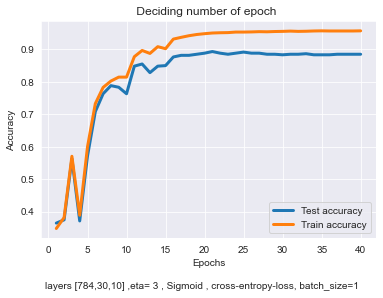

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
             y=test_accuracy, ax=ax, label='Test accuracy',linewidth=3)
sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
             y=train_accuracy, ax=ax, label='Train accuracy',linewidth=3)
ax.set_title(" Deciding number of epoch  ")
# ax.legend(['test_accuracy','train_accuracy','layers [784,30,10] ,eta= 3'])
ax.set_xlabel('Epochs'),ax.set_ylabel('Accuracy')
fig.text(.5, -0.05,
         'layers [784,30,10] ,eta= 3 , Sigmoid , cross-entropy-loss, batch_size=1 ', ha='center')


[784, 30, 10]


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))
/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))


[784, 30, 10]


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))
/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))


[784, 30, 10]


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))
/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))


[784, 30, 10]


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))
/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))


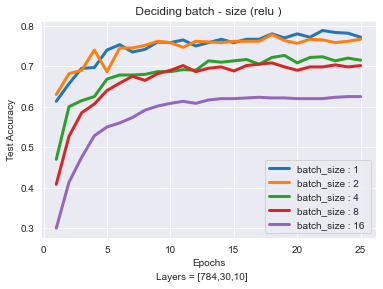

In [10]:
# Hence epoch =25 taken for future reference

# Decidin the batch size 
params = ParamGrid(paramGrid={'batch_size':[1,2,4,8,16],
                            'epoch':[25],
                            'neuron_type':['relu'],
                            'lmbda':[0],
                            'eta':[1e-2],
                            'cost':['cross_entropy_cost'],
                            'layers':[[784,30,10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print(param['layers'])
    nn  = NeuralNet(cost=param['cost'],size=param['layers'],neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)
    
    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                y=test_accuracy, ax=ax, label=   f'batch_size : {param["batch_size"]} ', linewidth=3)

ax.set_title(" Deciding batch - size (relu ) ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')

fig.text(0.5,-0.02, 'Layers = [784,30,10] ',ha='center')
plt.show()


In [ ]:
# Batch size= 4 ,epochs =20

# Finding the best learning rate 

params = ParamGrid(paramGrid={'batch_size': [1],
                              'epoch': [25],
                              'neuron_type': ['relu'],
                              'lmbda': [0],
                              'eta': [1e-2,5e-3,1e-3,1e-4],
                              'cost': ['cross_entropy_cost'],
                              'layers': [[784, 30, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print(param['layers'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'eta : {param["eta"]} ', linewidth=3)

ax.set_title(" Variation with the Learning rate(relu) ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')

fig.text(0.5, -0.02, 'Layers = [784,30,10] ', ha='center')
plt.show()



Training [784, 30, 10]


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))
/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))


Training [784, 100, 10]


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))
/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))


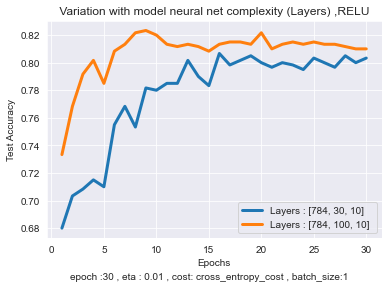

In [15]:
#  tuning the number of hidden layers and sizes 

params = ParamGrid(paramGrid={'batch_size': [1],
                              'epoch': [30],
                              'neuron_type': ['relu'],
                              'lmbda': [0],
                              'eta': [1e-2],
                              'cost': ['cross_entropy_cost'],
                              'layers': [[784, 30, 10],  [784,100, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print('Training',  param['layers'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'Layers : {param["layers"]} ', linewidth=3)

ax.set_title(" Variation with model neural net complexity (Layers) ,RELU ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')

fig.text(0.5, -0.02, f'epoch :{param["epoch"]} , eta : {param["eta"]} , cost: {param["cost"]} , batch_size:{param["batch_size"]}', ha='center')
plt.show()


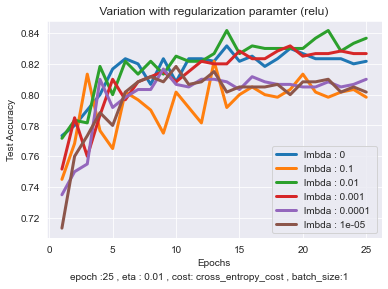

In [17]:
# Tuning the paramter lmbda
params = ParamGrid(paramGrid={'batch_size': [1],
                              'epoch': [25],
                              'neuron_type': ['relu'],
                              'lmbda': [0,1e-1,1e-2,1e-3,1e-4,1e-5],
                              'eta': [1e-2],
                              'cost': ['cross_entropy_cost'],
                              'layers': [[784, 100, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print('Training lmbda',  param['lmbda'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'lmbda : {param["lmbda"]} ', linewidth=3)

ax.set_title(" Variation with regularization paramter (relu) ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')
# ax.set_yticks(np.arange(0.0,1.1,0.1))

fig.text(0.5, -0.02,
         f'epoch :{param["epoch"]} , eta : {param["eta"]} , cost: {param["cost"]} , batch_size:{param["batch_size"]}', ha='center')
plt.show()


Training lmbda 0.01
Training lmbda 0.01


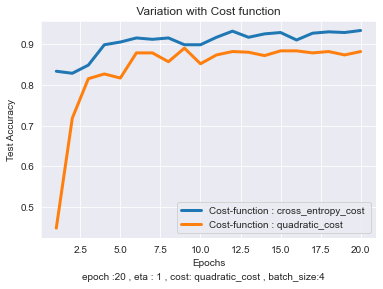

In [ ]:
# Tuning the cost function
params = ParamGrid(paramGrid={'batch_size': [4],
                              'epoch': [20],
                              'neuron_type': ['sigmoid'],
                              'lmbda': [1e-2],
                              'eta': [1],
                              'cost': ['cross_entropy_cost','quadratic_cost'],
                              'layers': [[784, 30, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print('Training lmbda',  param['lmbda'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'Cost-function : {param["cost"]} ', linewidth=3)

ax.set_title(" Variation with Cost function ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')
# ax.set_yticks(np.arange(0.0,1.1,0.1))

fig.text(0.5, -0.02,
         f'epoch :{param["epoch"]} , eta : {param["eta"]} , cost: {param["cost"]} , batch_size:{param["batch_size"]}', ha='center')
plt.show()


In [ ]:
# Grid_search
params = {  
        'batch_size': [4],
        'epoch': [15],
        'neuron_type': ['sigmoid'],
        'lmbda': [1e-2,5e-3,1e-3],
        'eta': [1],
        'cost': ['cross_entropy_cost'],
        'sizes': [[784, 30, 10],[784,100,10]]
        }

gg =gridSearchCV(params)
gg.fit(X,Y)


Configuration : {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 15, 'eta': 1, 'lmbda': 0.01, 'neuron_type': 'sigmoid', 'sizes': [784, 30, 10]}
Scores :  {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 15, 'eta': 1, 'lmbda': 0.01, 'neuron_type': 'sigmoid', 'sizes': [784, 30, 10], 'train_accuracy': 0.9520833333333334, 'train_cost': 0.5218406698465294, 'test_accuracy': 0.8983333333333333, 'test_cost': 0.7290283306560734}
Configuration : {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 15, 'eta': 1, 'lmbda': 0.01, 'neuron_type': 'sigmoid', 'sizes': [784, 100, 10]}
Scores :  {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 15, 'eta': 1, 'lmbda': 0.01, 'neuron_type': 'sigmoid', 'sizes': [784, 100, 10], 'train_accuracy': 0.9544166666666667, 'train_cost': 0.47257077004433384, 'test_accuracy': 0.9003333333333334, 'test_cost': 0.6939266410652256}
Configuration : {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 15, 'eta': 1, 'lmbda': 0.005, 'neuron_type':